# content

+ i
+ have
+ not 
+ yet
+ but $\cdots$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import requests
import io
import warnings 
import statsmodels.formula.api as smf
import statsmodels as sm

## didn't have statsmodels installed
# pip install statsmodels in terminal

## this sets some style parameters
sns.set()

## vscode ide demands these, jupyter lab not
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv"
content = requests.get(url).content.decode("utf-8")

warnings.filterwarnings('ignore') #another vscode thing

## Read in the data and display a few rows
dat = pd.read_csv(io.StringIO(content))
dat 

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0
4,1.580589,1.730152,-0.860949,1.245609,0.617957,0.866352,-0.099919,0.384261,0.391133,0.608826,0.071648,0.340601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.873210,0.539509,1.075184,0.741517,0.490891,-0.072004,0.490218,-0.202590,0.209201,-0.077513,0.209763,-0.102731,1
96,1.497552,-0.323060,0.751151,-0.151303,0.091900,-0.482855,0.296390,-0.255905,-0.023249,-0.339573,0.115855,-0.151665,1
97,1.634460,-0.240130,1.530142,-0.817861,0.195918,0.268417,0.378934,0.050704,0.018602,0.165713,0.246406,0.073374,1
98,1.484775,0.567067,-0.353472,0.542373,-0.005206,-0.063825,0.136869,-0.120705,0.015719,0.093438,0.010343,-0.006837,1


<Axes: xlabel='FLAIR', ylabel='GOLD_Lesions'>

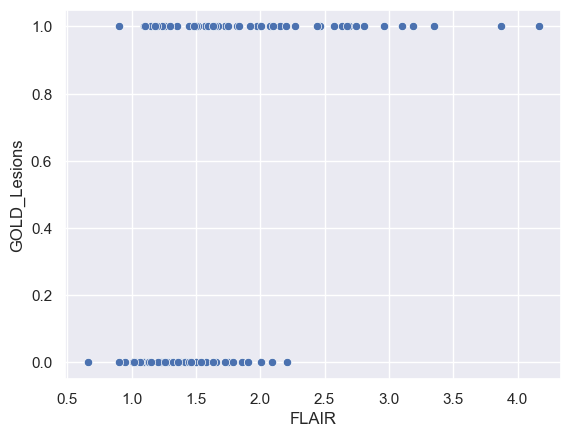

In [2]:
## Plot the data
sns.scatterplot(x='FLAIR', y='GOLD_Lesions', data = dat) #vscode

#sns.scatterplot('FLAIR', 'GOLD_Lesions', data = dat) #jupyterlab

In [3]:
x = dat[['FLAIR']]
y = dat.GOLD_Lesions
trainFraction = .75

## Once again hold out some data
sample = np.random.uniform(size = 100) < trainFraction
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]

In [4]:
lr = lm.LogisticRegression(fit_intercept=True, penalty='none')
fit = lr.fit(xtrain, ytrain)

In [5]:
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

[-3.6901407431043736, 2.3236534424749173]

<Axes: xlabel='FLAIR', ylabel='GOLD_Lesions'>

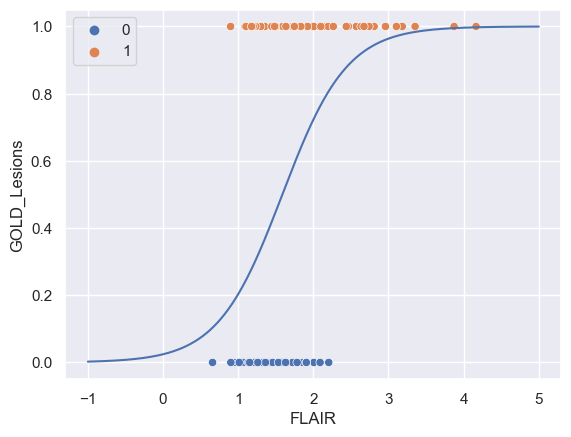

In [6]:
n = 1000
xplot = np.linspace(-1, 5, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.scatterplot(x='FLAIR', y='GOLD_Lesions', data = dat, hue = 'GOLD_Lesions')
sns.lineplot(x=xplot, y=p)

## Of course, scikit has a predict
## function so that you don't have to do this manually
#yplot = fit.predict_proba(xplot.reshape((n, 1)))
#sns.lineplot(xplot, yplot[:, 1])

In [7]:
## This predicts the classes using a 50% probability cutoff
yhat_test = fit.predict(xtest)

## double checking that if you want
#all(yhat_test == (fit.predict_proba(xtest)[:, 1] > .5))

accuracy = np.mean(yhat_test == ytest)
sensitivity = np.mean(yhat_test[ytest == 1] == ytest[ytest == 1])
specificity = np.mean(yhat_test[ytest == 0] == ytest[ytest == 0])
np.round([accuracy, sensitivity, specificity], 3)

array([0.615, 0.615, 0.615])

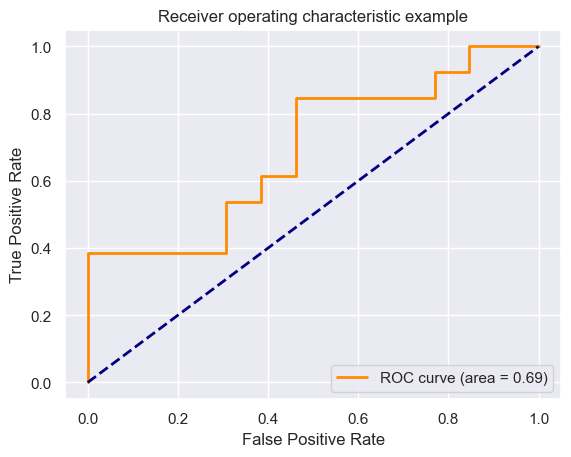

In [8]:
from sklearn.metrics import accuracy_score, roc_curve, auc

ptest = fit.predict_proba(xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, ptest)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:


## this sets some style parameters  
sns.set()

## Read in the data 
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv"
content = requests.get(url).content.decode('utf-8')
dat = pd.read_csv(io.StringIO(content))
dat 

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0
4,1.580589,1.730152,-0.860949,1.245609,0.617957,0.866352,-0.099919,0.384261,0.391133,0.608826,0.071648,0.340601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.873210,0.539509,1.075184,0.741517,0.490891,-0.072004,0.490218,-0.202590,0.209201,-0.077513,0.209763,-0.102731,1
96,1.497552,-0.323060,0.751151,-0.151303,0.091900,-0.482855,0.296390,-0.255905,-0.023249,-0.339573,0.115855,-0.151665,1
97,1.634460,-0.240130,1.530142,-0.817861,0.195918,0.268417,0.378934,0.050704,0.018602,0.165713,0.246406,0.073374,1
98,1.484775,0.567067,-0.353472,0.542373,-0.005206,-0.063825,0.136869,-0.120705,0.015719,0.093438,0.010343,-0.006837,1


In [10]:
trainFraction = .75

sample = np.random.uniform(size = 100) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]

In [11]:
results = smf.ols('PD ~ FLAIR + T1 + T2  + FLAIR_10 + T1_10 + T2_10 + FLAIR_20', data = trainingDat).fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.731   
Dependent Variable: PD               AIC:                67.3386 
Date:               2023-05-14 21:48 BIC:                86.0890 
No. Observations:   77               Log-Likelihood:     -25.669 
Df Model:           7                F-statistic:        30.50   
Df Residuals:       69               Prob (F-statistic): 9.14e-19
R-squared:          0.756            Scale:              0.12727 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.2135    0.1353   1.5776  0.1192  -0.0565   0.4835
FLAIR         -0.0115    0.0864  -0.1330  0.8946  -0.1839   0.1609
T1            -0.1932    0.0851  -2.2714  0.0262  -0.3629  -0.0235
T2             0.6006    0.0870   6.9001  0.0000   0.4269   0.7742
FLAIR_10      -0.117

In [12]:
x = dat[['FLAIR','T1', 'T2', 'FLAIR_10', 'T1_10', 'T2_10', 'FLAIR_20']]
y = dat[['GOLD_Lesions']]
## Add the intercept column
x = sm.tools.add_constant(x)

xtraining = x[sample]
xtesting = x[~sample]
ytraining = y[sample]
ytesting = y[~sample]

In [13]:
fit = sm.discrete.discrete_model.Logit(ytraining, xtraining).fit()

Optimization terminated successfully.
         Current function value: 0.212742
         Iterations 9


In [14]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           GOLD_Lesions   No. Observations:                   77
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            7
Date:                Sun, 14 May 2023   Pseudo R-squ.:                  0.6930
Time:                        21:48:59   Log-Likelihood:                -16.381
converged:                       True   LL-Null:                       -53.366
Covariance Type:            nonrobust   LLR p-value:                 2.321e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8475      1.943     -2.494      0.013      -8.656      -1.039
FLAIR          2.3827      1.249      1.908      0.056      -0.066       4.831
T1             3.3436      1.311      2.550      0.011       0.774       5.913
T2             2.6150      1.347      1.942      0.052      -0.024       5.254
FLAIR_10      10.4060      4.365      2.384      0.017       1.851      18.961
T1_10          0.5536      1.844      0.300      0.764      -3.060       4.167
T2_10         -5.8979      3.722     -1.584      0.113     -13.194       1.398
FLAIR_20     -25.5693     10.257     -2.493      0.013     -45.673      -5.466
==============================================================================
"""

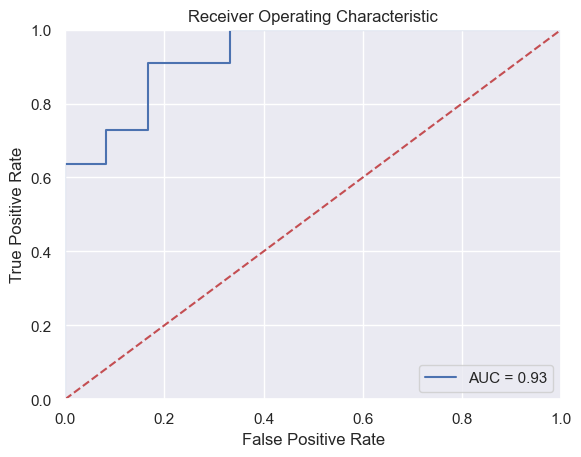

In [15]:
phatTesting = fit.predict(xtesting)

## See here for plotting
## https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, threshold = skl.metrics.roc_curve(ytesting, phatTesting)
roc_auc = skl.metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
results = smf.logit(formula = 'GOLD_Lesions ~ FLAIR + T1 + T2 + FLAIR_10 + T1_10 + T2_10 + FLAIR_20', data = trainingDat).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.212742
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           GOLD_Lesions   No. Observations:                   77
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            7
Date:                Sun, 14 May 2023   Pseudo R-squ.:                  0.6930
Time:                        21:49:00   Log-Likelihood:                -16.381
converged:                       True   LL-Null:                       -53.366
Covariance Type:            nonrobust   LLR p-value:                 2.321e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8475      1.943     -2.494      0.013      -8.656      -1.039
FLAIR          2.3827      1.249      1.908      0.056      -0.066       4.831
T1             3.3436      1.311      2.550      0.011       0.774       5.913
T2             2.6150      1.347      1.942      0.052      -0.024       5.254
FLAIR_10      10.4060      4.365      2.384      0.017       1.851      18.961
T1_10          0.5536      1.844      0.300      0.764      -3.060       4.167
T2_10         -5.8979      3.722     -1.584      0.113     -13.194       1.398
FLAIR_20     -25.5693     10.257     -2.493      0.013     -45.673      -5.466
==============================================================================
"""

In [17]:
results = smf.ols('PD ~ FLAIR + T1 + T2  + FLAIR_10 + T1_10 + T2_10 + FLAIR_20', data = dat).fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.743   
Dependent Variable: PD               AIC:                95.4183 
Date:               2023-05-14 21:49 BIC:                116.2597
No. Observations:   100              Log-Likelihood:     -39.709 
Df Model:           7                F-statistic:        41.98   
Df Residuals:       92               Prob (F-statistic): 5.56e-26
R-squared:          0.762            Scale:              0.14081 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.2349    0.1231   1.9086  0.0594  -0.0095   0.4794
FLAIR         -0.0160    0.0761  -0.2107  0.8336  -0.1671   0.1351
T1            -0.2116    0.0777  -2.7251  0.0077  -0.3659  -0.0574
T2             0.6078    0.0747   8.1323  0.0000   0.4593   0.7562
FLAIR_10      -0.258

In [18]:
# Model for PD with FLAIR removed
dat['PD_adjusted'] = smf.ols('PD ~ T1 + T2  + FLAIR_10 + T1_10 + T2_10 + FLAIR_20', data = dat).fit().resid
# Model for FLAIR 
dat['FLAIR_adjusted'] = smf.ols('FLAIR ~ T1 + T2  + FLAIR_10 + T1_10 + T2_10 + FLAIR_20', data = dat).fit().resid


out = smf.ols('PD_adjusted ~ FLAIR_adjusted', data = dat).fit()
print(out.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.010 
Dependent Variable: PD_adjusted      AIC:                83.4183
Date:               2023-05-14 21:49 BIC:                88.6286
No. Observations:   100              Log-Likelihood:     -39.709
Df Model:           1                F-statistic:        0.04730
Df Residuals:       98               Prob (F-statistic): 0.828  
R-squared:          0.000            Scale:              0.13219
----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
----------------------------------------------------------------
Intercept         -0.0000   0.0364 -0.0000 1.0000 -0.0722 0.0722
FLAIR_adjusted    -0.0160   0.0737 -0.2175 0.8283 -0.1623 0.1303
----------------------------------------------------------------
Omnibus:              2.142        Durbin-Watson:          2.187
Prob(Omnibus):        0.343        Jarque-

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [20]:
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/swiss.csv"
content = requests.get(url).content.decode('utf-8')
dat = pd.read_csv(io.StringIO(content))
dat.head()

,Region,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [21]:
y = dat.Fertility
x = dat.drop(['Region', 'Fertility'], axis=1)
fit = LinearRegression().fit(x, y)
yhat = fit.predict(x)
[fit.intercept_, fit.coef_]

[66.91518167896871,
 array([-0.17211397, -0.25800824, -0.87094006,  0.10411533,  1.07704814])]

In [22]:
x2 = x
x2['Test'] = x2.Agriculture + x2.Examination
fit2 = LinearRegression().fit(x2, y)
yhat2 = fit2.predict(x2)

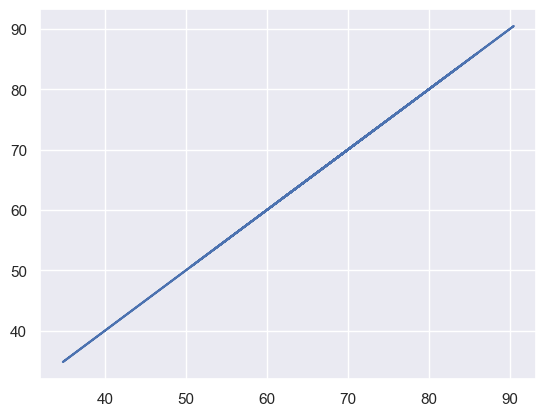

In [23]:
plt.plot(yhat, yhat2)

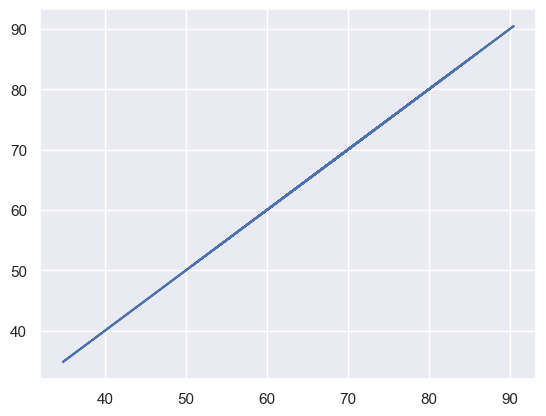

In [24]:
x3 = x2.drop(['Agriculture'], axis = 1)
fit3 = LinearRegression().fit(x3, y)
yhat3 = fit3.predict(x3)
plt.plot(yhat, yhat3)

In [25]:
import copy 

In [26]:
def myplot(x, y, t):
    x1 = x[t == 1]
    x0 = x[t == 0]
    y1 = y[t == 1]
    y0 = y[t == 0]
    xm1 = np.mean(x1)
    xm0 = np.mean(x0)
    ym1 = np.mean(y1)
    ym0 = np.mean(y0)

    X = np.array([x, t]).transpose()
    out = LinearRegression().fit(X, y)
    b0hat = out.intercept_
    b1hat = out.coef_[0]
    b2hat = out.coef_[1]
    
    plt.scatter(x0, y0)
    plt.scatter(x1, y1)

    col = sns.color_palette()

    plt.axhline(y = ym0, c = col[0])
    plt.axhline(y = ym1, c = col[1])

    xlim = [np.min(x), np.max(x)]

    ylim0 = [z * b1hat + b0hat + b2hat for z in xlim]
    ylim1 = [z * b1hat + b0hat         for z in xlim]

    plt.plot( xlim, ylim1)
    plt.plot( xlim, ylim0) 

    plt.show()

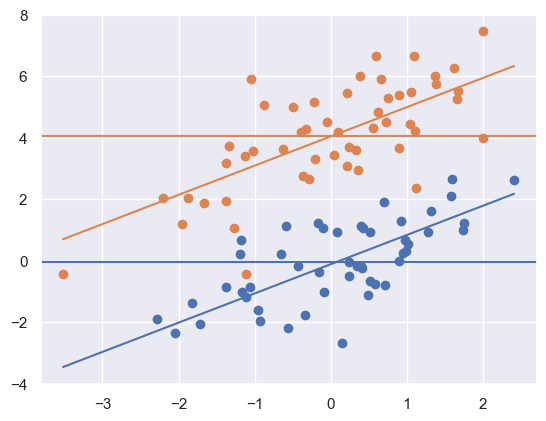

In [27]:
n = 100
x = np.random.normal(size = n)
e = np.random.normal(size = n)
t = np.random.binomial(1, .5, n)

beta0 = 0
beta1 = 1
beta2 = 4

y = beta0 + beta1 * x + beta2 * t + e

myplot(x, y, t)

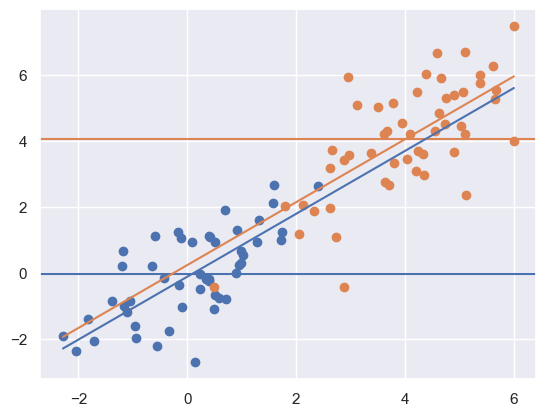

In [28]:
myplot(x + t * 4, y, t)

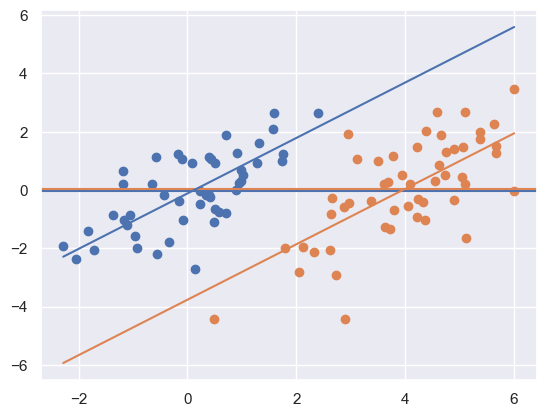

In [29]:
myplot(x + t * 4, y  - t * 4, t)

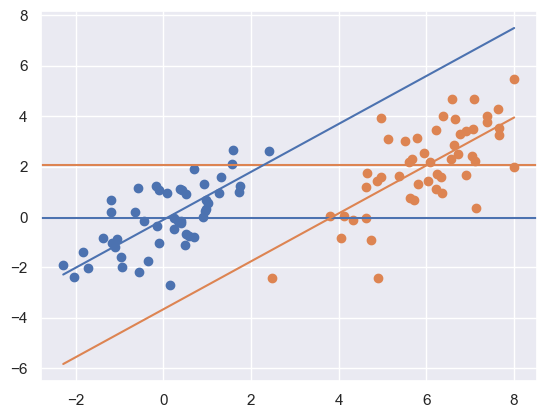

In [30]:
myplot(x + t * 6, y  - t * 2, t)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,5,1) ** 2
t = np.arange(0, 4, 1)
n = 4
F0 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 0 / n))
F1 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 1 / n))
F2 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 2 / n))
F3 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 3 / n))

np.round([F0, F1, F2, F3], 3)

array([ 30. +0.j,  -8.+12.j, -10. -0.j,  -8.-12.j])

In [32]:
F = np.fft.fft(x)
F

array([ 30. +0.j,  -8.+12.j, -10. +0.j,  -8.-12.j])

<function matplotlib.pyplot.show(close=None, block=None)>

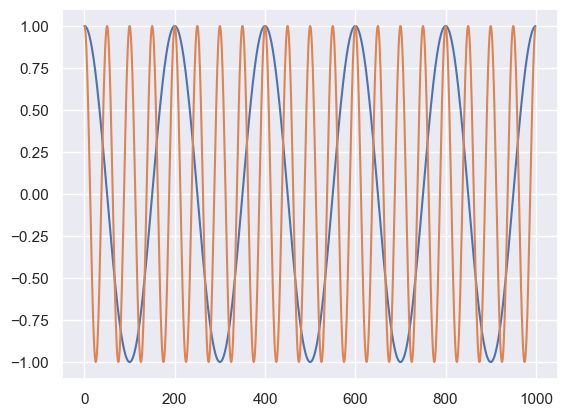

In [33]:
n = 1000
t = np.arange(0, n, 1)
c1 = np.cos(2 * np.pi * t * 5 / n)
c2 = np.cos(2 * np.pi * t * 20 / n)
plt.plot(t, c1)
plt.plot(t, c2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

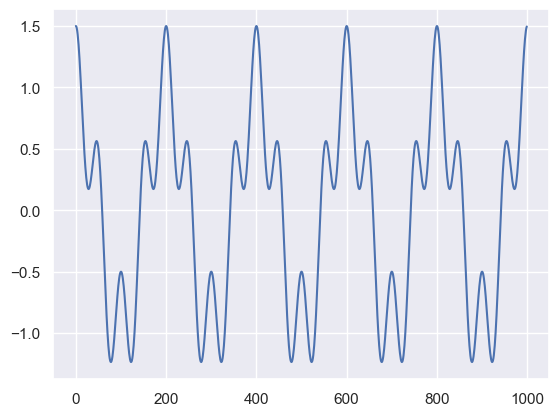

In [34]:
x = c1 + .5 * c2
plt.plot(t, x)
plt.show

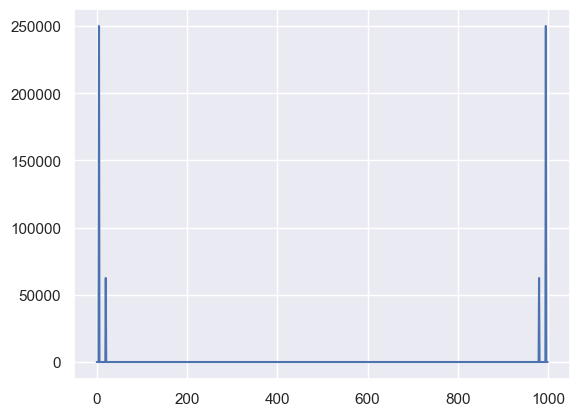

(array([  5,  20, 980, 995]),)

In [35]:
a = np.fft.fft(x)
b = a.real ** 2 + a.imag ** 2
plt.plot(b)
plt.show()
np.where(b > 1e-5)

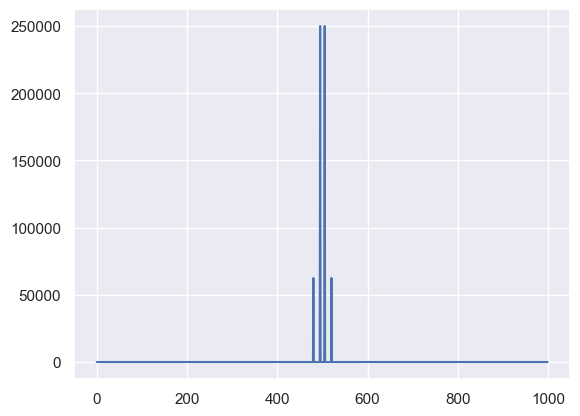

In [36]:
## Plotting the spectrum so that it's in the middle
a = np.fft.fft(x * (-1) ** t)
b = a.real ** 2 + a.imag ** 2
plt.plot(b)
plt.show()

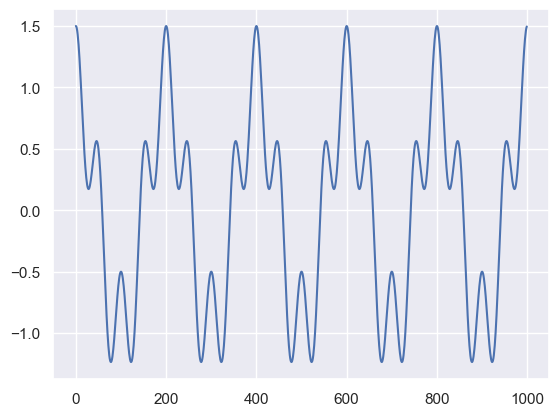

In [37]:
## demonstrating going backwards
a = np.fft.fft(x)
b = np.fft.ifft(a)

plt.plot(b)
plt.show()

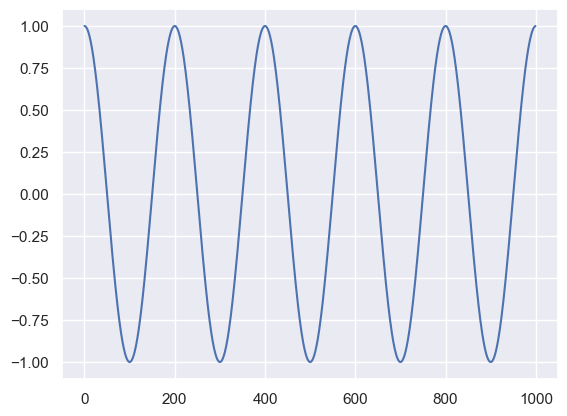

In [38]:
## demonstrating hard filtering
a = np.fft.fft(x)
n = a.size
timestep = 1/100
## a function that shows what the frequencies are in the units you want
w = np.fft.fftfreq(n, timestep)


b = a
b[(abs(w) > .5)] = 0
c = np.fft.ifft(b).real
plt.plot(c)
plt.show()

In [39]:

url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/'
url2 = 'csse_covid_19_data/csse_covid_19_time_series/'
url3 = 'time_series_covid19_confirmed_global.csv'
url4 = url1 + url2 + url3
dat = pd.read_csv(io.StringIO(requests.get(url4).content.decode('utf-8')))
dat.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
